In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('wines_SPA.csv')

In [3]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
df.shape

(7500, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [6]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1=df.copy()
for column in df1.columns:
    if df1[column].dtype == 'object':  
        df1[column] = label_encoder.fit_transform(df1[column])

In [8]:
!pip install category_encoders

In [10]:
import category_encoders as ce
df2=df.copy()
for column in df2.columns:
    if df2[column].dtype == 'object':  
        binary_encoder = ce.BinaryEncoder(cols=[column])
        df_binary = binary_encoder.fit_transform(df[column])


In [18]:
df_binary

,type_0,type_1,type_2,type_3,type_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,0,1,1
4,0,0,0,1,1
...,...,...,...,...,...
7495,0,1,0,0,0
7496,0,0,1,1,1
7497,0,0,1,0,1
7498,0,0,0,1,1


In [20]:
corr=df1.corr()

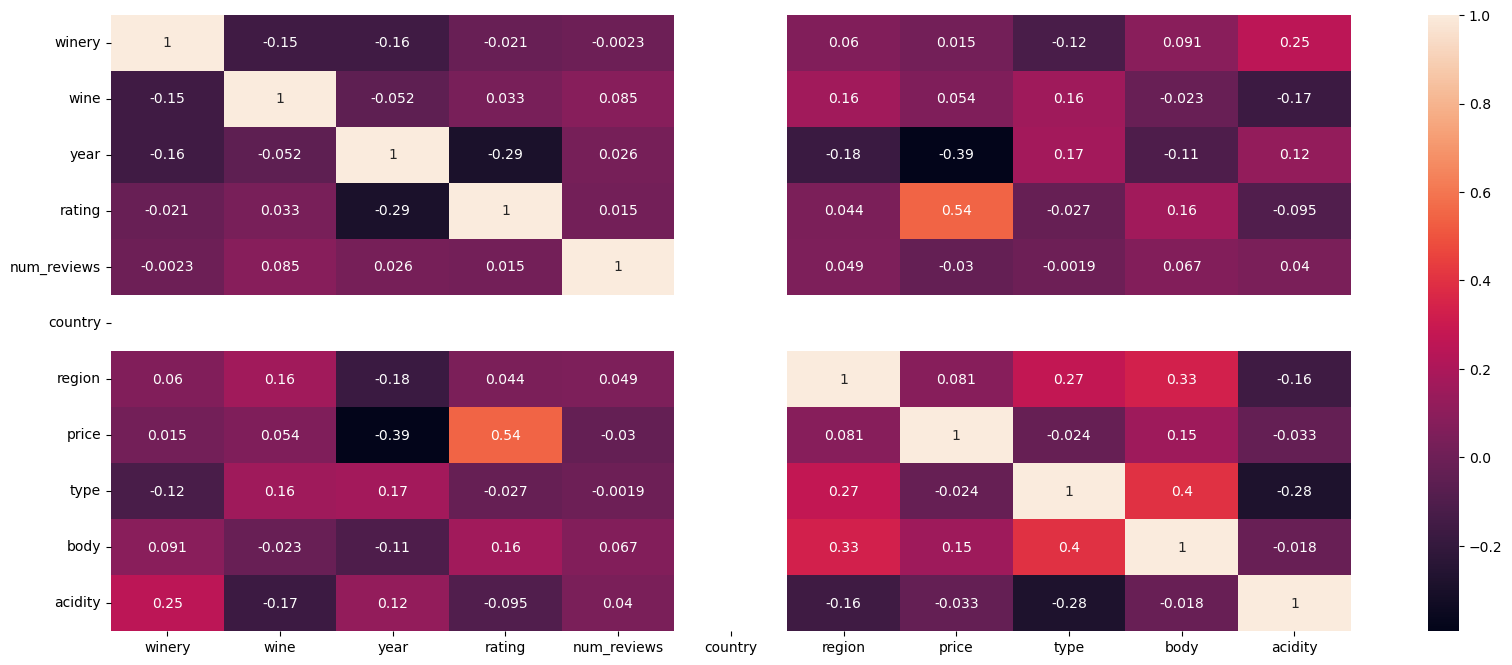

In [21]:
import seaborn as sn
plt.figure(figsize=(20,8))
sn.heatmap(corr,annot=True)
plt.show()

In [22]:
df1.drop(columns=['country','num_reviews','winery'],inplace=True)

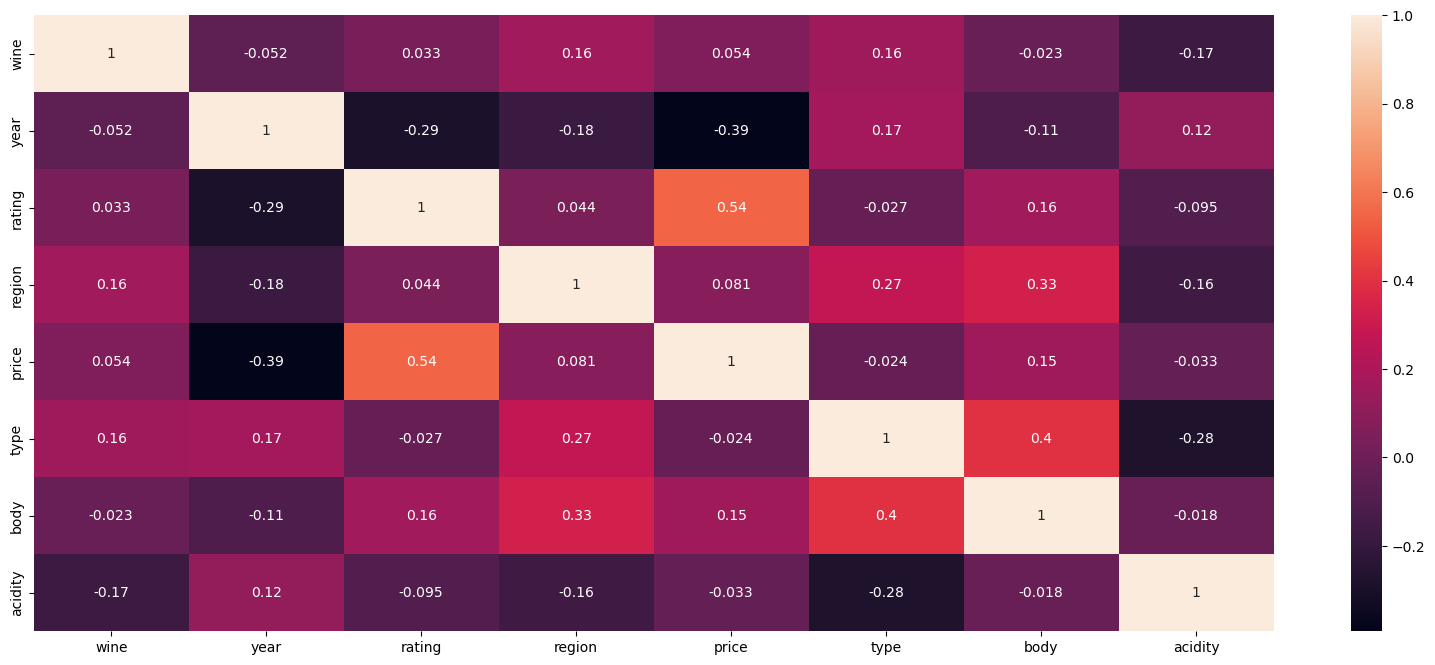

In [23]:
corr=df1.corr()
plt.figure(figsize=(20,8))
sn.heatmap(corr,annot=True)
plt.show()